In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
X = pd.read_csv('training_set_features.csv')
y = pd.read_csv('training_set_labels.csv')
# Xtest = pd.read_csv('test_set_features.csv')

In [3]:
X.isna().sum()
# X.drop(['respondent_id'],axis = 1,inplace=True)
y.drop(['respondent_id'],axis = 1,inplace=True)

In [4]:
print(X.shape,y.shape)

(26707, 36) (26707, 2)


In [25]:
X_numerical_column = X.select_dtypes(include = ['float64']).columns.tolist()
X_categorical_column = X.select_dtypes(include = ['object']).columns.tolist()
# Xtest_numerical_column = Xtest.select_dtypes(include = ['float64']).columns.tolist()
# Xtest_categorical_column = Xtest.select_dtypes(include = ['object']).columns.tolist()


In [6]:
print(sum(X.isna().sum(axis=1) > 0))
# print(sum(Xtest.isna().sum(axis=1) > 0))


20270


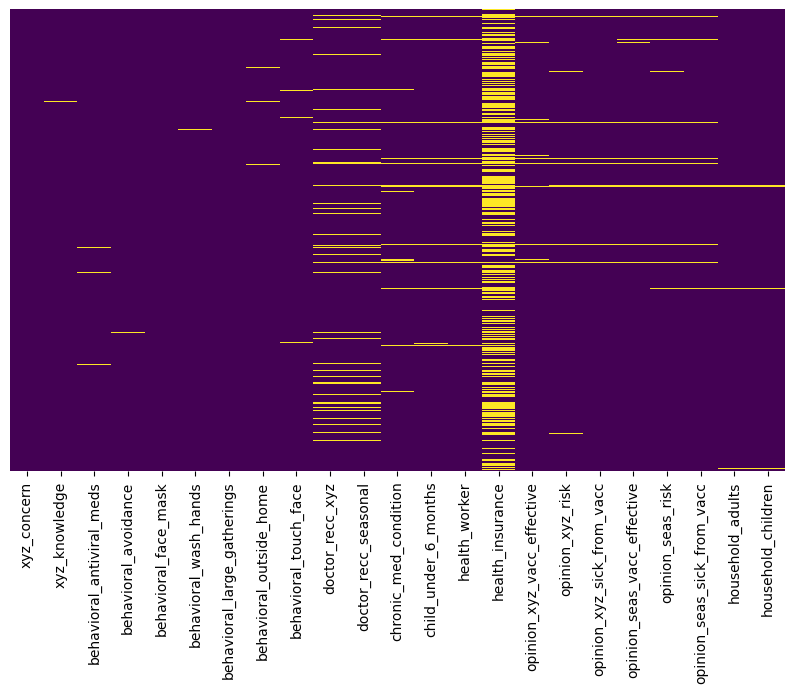

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(X_numerical_column.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.show()

In [11]:
# numerical_transformer = SimpleImputer(strategy='mean')
# categorical_transformer = SimpleImputer(strategy='most_frequent')

# # Bundle preprocessing for numerical and categorical data
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, X_numerical_column),  # 'num' is a label for numerical transformer
#         ('cat', categorical_transformer, X_categorical_column)  # 'cat' is a label for categorical transformer
#     ])

# # Apply the transformations
# df_imputed = pd.DataFrame(preprocessor.fit_transform(X), columns=X_numerical_column +  X_categorical_column)

# df_imputed[numerical_column] = df_imputed[numerical_column].apply(pd.to_numeric)
# df_imputed.info()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [12]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [13]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X_numerical_column),
        ('cat', categorical_transformer, X_categorical_column)
    ])

In [14]:
X_preprocessed = preprocessor.fit_transform(X)

In [15]:
numerical_features = preprocessor.named_transformers_['num']['imputer'].feature_names_in_
categorical_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(X_categorical_column)
all_features = np.concatenate([numerical_features, categorical_features])
X_preprocessed_df = pd.DataFrame(X_preprocessed.tolist(), columns=all_features)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.25, random_state=42)

In [19]:
model = MultiOutputClassifier(LogisticRegression(max_iter=1000, random_state=42))
model.fit(X_train, y_train)

MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000,
                                                   random_state=42))

In [20]:
y_pred = model.predict_proba(X_test)


In [21]:
from sklearn.metrics import roc_auc_score

for i, column in enumerate(y.columns):
    print(f'ROC AUC Score for {column}: {roc_auc_score(y_test[column], y_pred[i][:, 1])}')

ROC AUC Score for xyz_vaccine: 0.8356889857273573
ROC AUC Score for seasonal_vaccine: 0.8571720402356174


In [29]:
X_test_set_features = pd.read_csv('test_set_features.csv')
X_test_set_features.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [32]:
X_test_set_features.isna().sum()

respondent_id                      0
xyz_concern                       85
xyz_knowledge                    122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_xyz_vacc_effective       398
opinion_xyz_risk                 380
opinion_xyz_sick_from_vacc       375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [40]:
X_test_set_numerical_column = X_test_set_features.select_dtypes(include = ['float64']).columns.tolist()
X_test_set_categorical_column = X_test_set_features.select_dtypes(include = ['object']).columns.tolist()

X_test_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X_test_set_numerical_column),
        ('cat', categorical_transformer, X_test_set_categorical_column)
    ])
X_test_set_preprocessed = X_test_preprocessor.fit_transform(X_test_set_features)

X_test_numerical_features = X_test_preprocessor.named_transformers_['num']['imputer'].feature_names_in_
X_test_categorical_features = X_test_preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(X_test_set_categorical_column)
X_test_all_features = np.concatenate([X_test_numerical_features, X_test_categorical_features])
X_preprocessed_df = pd.DataFrame(X_test_set_preprocessed.tolist(), columns=X_test_all_features)

def preprocess_test_data(X_test_set_features):
    X_test_preprocessed = preprocessor.transform(X_test_set_features)
    X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed.tolist(), columns=X_test_all_features)
    return X_test_preprocessed_df

y_pred_test = model.predict_proba(preprocess_test_data(X_test_set_features))

In [41]:
y_pred_test

[array([[0.94218482, 0.05781518],
        [0.98042041, 0.01957959],
        [0.65836409, 0.34163591],
        ...,
        [0.83865399, 0.16134601],
        [0.94801847, 0.05198153],
        [0.39313638, 0.60686362]]),
 array([[0.68408852, 0.31591148],
        [0.96294437, 0.03705563],
        [0.48701369, 0.51298631],
        ...,
        [0.79025097, 0.20974903],
        [0.65367365, 0.34632635],
        [0.48941208, 0.51058792]])]

In [51]:
xyz_vaccine_probs = y_pred_test[0][:, 1]  # Probabilities for xyz_vaccine
seasonal_vaccine_probs = y_pred_test[1][:, 1]



In [54]:
respondent_id = X_test_set_features['respondent_id']
submission_df = pd.DataFrame({
    'respondent_id': respondent_id,
    'xyz_vaccine': xyz_vaccine_probs,
    'seasonal_vaccine': seasonal_vaccine_probs
})
submission_df.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.057815,0.315911
1,26708,0.019580,0.037056
2,26709,0.341636,0.512986
3,26710,0.509671,0.873664
4,26711,0.170620,0.455151


In [57]:
submission_df.to_csv('submission.csv', index=False)